In [6]:
import pandas as pd
import numpy as np
from numpy import random
import sklearn
from sklearn import metrics
import statsmodels.api as sm 
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from random import randint

In [7]:
data = pd.read_csv('New_data/LBNL_FDD_Dataset_SDAHU/AHU_annual.csv')
data

,Datetime,CHWC_VLV,CHWC_VLV_DM,MA_TEMP,OA_CFM,OA_DMPR,OA_DMPR_DM,OA_TEMP,RA_CFM,RA_DMPR,...,SF_CS,SF_SPD,SF_SPD_DM,SF_WAT,SYS_CTL,ZONE_TEMP_1,ZONE_TEMP_2,ZONE_TEMP_3,ZONE_TEMP_4,ZONE_TEMP_5
0,2018-01-01 01:00:00,2.635303e-21,0.0,66.374680,357730.44,0.0,0.0,10.355011,0.853194,1.0,...,0.0,0.9,0.0,-2.791519e-13,0.0,73.946520,66.767230,67.027100,66.761345,67.206566
1,2018-01-01 01:01:00,2.479578e-21,0.0,66.374680,357730.44,0.0,0.0,10.040033,0.853057,1.0,...,0.0,0.9,0.0,-2.790612e-13,0.0,73.977770,66.766680,67.025894,66.761290,67.207720
2,2018-01-01 01:02:00,2.380361e-21,0.0,66.374680,357730.44,0.0,0.0,10.055031,0.852918,1.0,...,0.0,0.9,0.0,-2.789696e-13,0.0,74.008360,66.766014,67.024580,66.761185,67.208760
3,2018-01-01 01:03:00,-1.274259e-21,0.0,66.374626,357730.44,0.0,0.0,10.070026,0.852779,1.0,...,0.0,0.9,0.0,-2.788807e-13,0.0,74.038250,66.765305,67.023150,66.761020,67.209700
4,2018-01-01 01:04:00,2.749987e-21,0.0,66.374626,357730.44,0.0,0.0,10.085022,0.852641,1.0,...,0.0,0.9,0.0,-2.787895e-13,0.0,74.067410,66.764530,67.021670,66.760740,67.210570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525535,2018-12-31 23:55:00,1.036425e-28,0.0,69.257660,357730.44,0.0,0.0,21.218018,-0.004739,1.0,...,0.0,0.9,0.0,-8.607382e-18,0.0,72.068450,62.158733,61.904840,62.248436,62.021736
525536,2018-12-31 23:56:00,5.023776e-25,0.0,69.257660,357730.44,0.0,0.0,21.185005,-0.004736,1.0,...,0.0,0.9,0.0,-8.599293e-18,0.0,72.067795,62.154064,61.899567,62.244040,62.016403
525537,2018-12-31 23:57:00,1.209952e-24,0.0,69.257660,357730.44,0.0,0.0,21.151989,-0.004739,1.0,...,0.0,0.9,0.0,-8.605141e-18,0.0,72.067140,62.149395,61.894238,62.239700,62.011078
525538,2018-12-31 23:58:00,-8.305250e-25,0.0,69.257660,357730.44,0.0,0.0,21.119030,-0.004735,1.0,...,0.0,0.9,0.0,-8.592532e-18,0.0,72.066480,62.144670,61.888910,62.235363,62.005690


ValueError: The condensed distance matrix must contain only finite values.

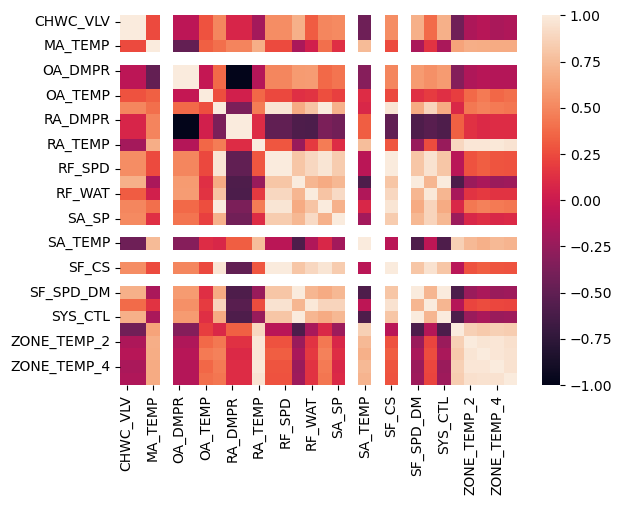

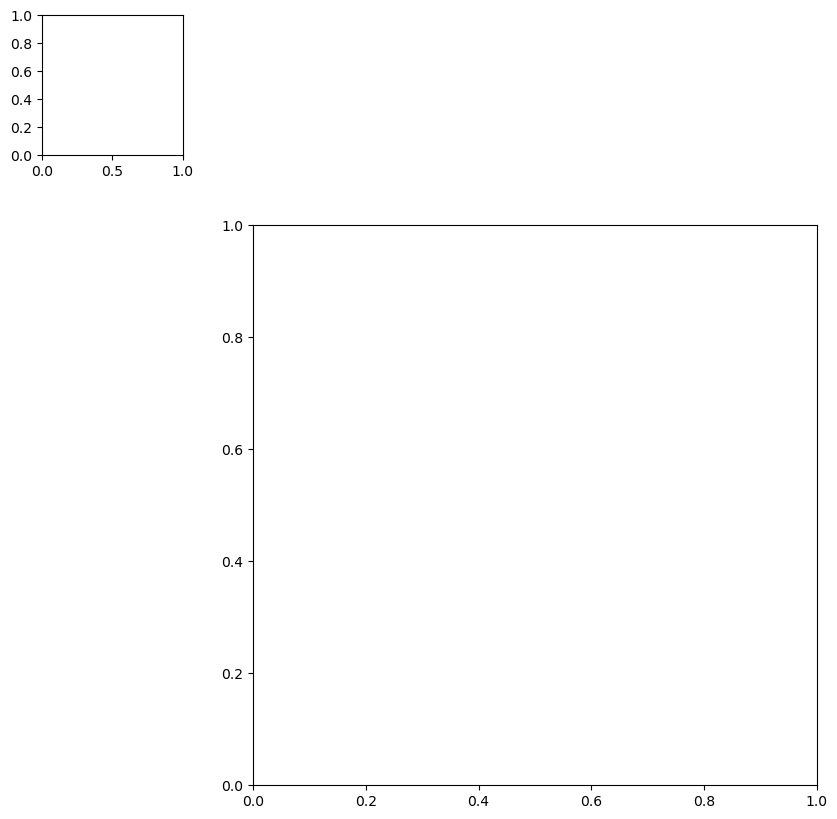

In [4]:
data.head() #MA_temp = mixed air , OA = outside air
import seaborn as sns

# calculate the correlations
correlations = data.corr()

# plot the heatmap 
sns.heatmap(correlations, annot=False)

# plot the clustermap 
sns.clustermap(correlations, annot=False)

In [5]:
data = data.set_index('Datetime')
data =data[['RA_TEMP','OA_TEMP', 'MA_TEMP','SA_TEMP','SA_CFM','ZONE_TEMP_1','ZONE_TEMP_2','ZONE_TEMP_3','ZONE_TEMP_4']]
data['OA_TEMP'] = data['OA_TEMP'] 
data['RA_TEMP'] = data['RA_TEMP']
data['MA_TEMP'] = data['MA_TEMP']
data['SA_TEMP'] = data['SA_TEMP']
data['ZONE_TEMP_1'] = data['ZONE_TEMP_1']
data['ZONE_TEMP_2'] = data['ZONE_TEMP_2']
data['ZONE_TEMP_3'] = data['ZONE_TEMP_3']
data['ZONE_TEMP_4'] = data['ZONE_TEMP_4']



In [47]:
value = []
for i  in range(len(data['SA_TEMP'])):
    value = randint(0,4)

<AxesSubplot:>

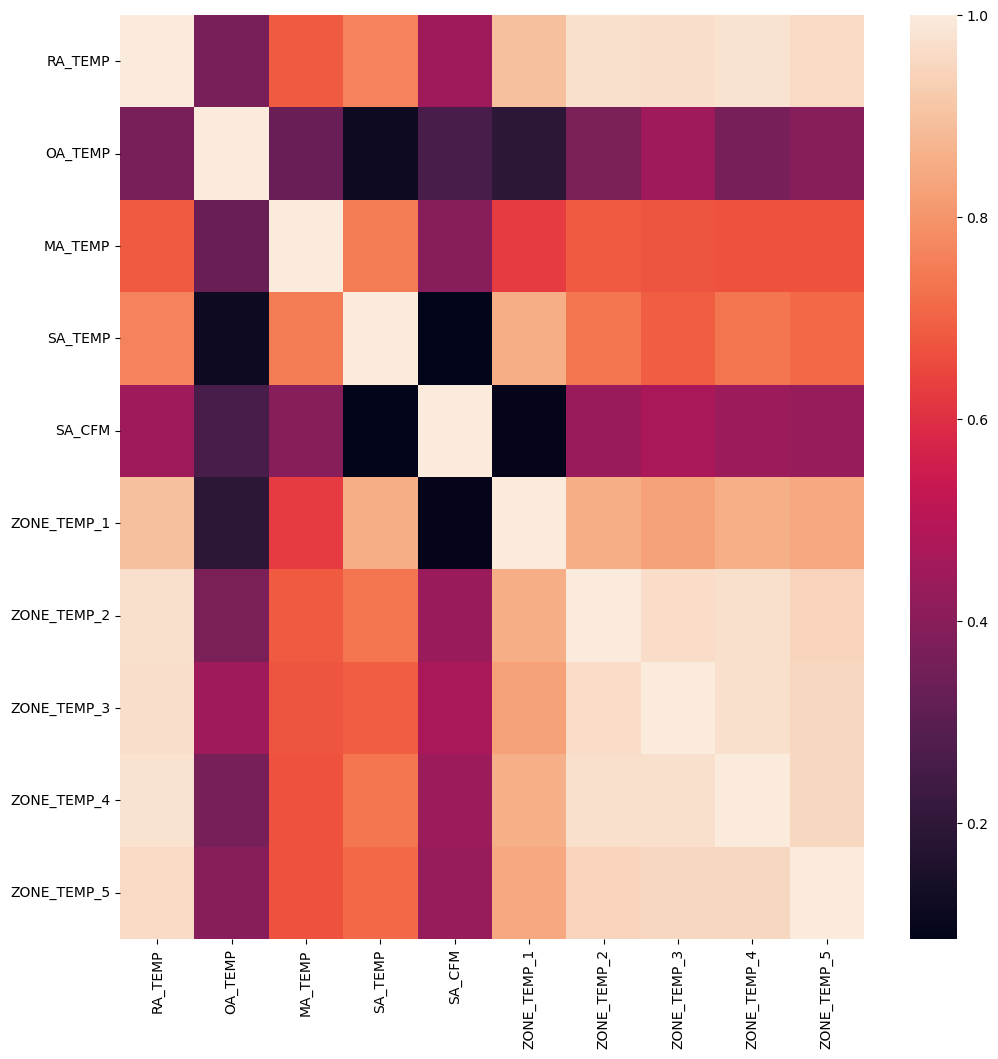

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,12))
sns.heatmap(data.corr())

In [24]:
train_data, test_data = train_test_split(data,test_size=0.3)

In [25]:
train_data.shape

(367878, 10)

In [26]:
test_data.shape

(157662, 10)

In [48]:
def simulateFault(sensedValues, params):
    end_fault_index = int(len(sensedValues) *0.8)
    interval = end_fault_index/6
    BMS = []
    classification = []
    
    noise = random.rand(len(sensedValues)) * 0.5
    for i in range(0, len(sensedValues)):
        if i <= interval:
            a = params['constant']
            sign = random.randint(1,3)
            if sign == 1:
                BMS.append(noise[i] + a + sensedValues[i])
            else:
                BMS.append(-noise[i] + a + sensedValues[i])
            classification.append(1)

        elif i > interval and i <= interval*2:
            B = params['coeff']
            sign = random.randint(1,3)
            if sign == 1:
                BMS.append(noise[i] + B * sensedValues[i])
            else:
                BMS.append(-noise[i] + B * sensedValues[i])
            classification.append(1)
        elif i > interval*2 and i <= interval*3:
            a = params['cg'][0]
            B = params['cg'][1]
            sign = random.randint(1,3)
            if sign == 1:
                BMS.append(noise[i] + a + (B * sensedValues[i]))
            else:
                BMS.append(-noise[i] + a + (B * sensedValues[i]))
            classification.append(1)
            
        elif i > interval*3 and i <= interval*4:
            a = params['varing time gain']
            B = random.uniform(a[0], a[1])
            sign = random.randint(1,3)
            if sign == 1:
                BMS.append(noise[i] +B * sensedValues[i])
            else:
                BMS.append(-noise[i] + B * sensedValues[i])
            classification.append(1)
        elif i > interval*4 and i<= interval*5:
            a = params['stuck']
            BMS.append(a)
            classification.append(1)
            
        elif i > interval*5 and i<= interval*6:
            type_fault = random.randint(1,3)
            low_bound = params['bounds'][0]
            up_bound = params['bounds'][1]
            if type_fault == 1:
                BMS.append(low_bound-noise[i])
            else:
                BMS.append(up_bound + noise[i])
            classification.append(1)
        else:
            BMS.append(noise[i] + sensedValues[i])
            classification.append(0)

    BMS = np.array(BMS)
    BMS = BMS.round(decimals = 3)
    sensedValues = sensedValues.round(decimals=3)
    return np.array(BMS), np.array(classification)

def simulateSpecificFault(sensedValues, params, value):
    end_fault_index = int(len(sensedValues) * 0.5)
    interval = end_fault_index
    BMS = []
    classification = []
    
    #noise = random.rand(len(sensedValues)) * 0
    
    for i in range(0, len(sensedValues)):
        if i < interval:
            if params == 'constant':
                a = value
                #sign = random.randint(1,3)
                #print('goes here')
                #if sign == 1:
                BMS.append(a + sensedValues[i])
                #else:
                #    BMS.append(noise[i] - a + sensedValues[i])
                classification.append(1)

            elif params == 'gain':
                B = value 
                sign = random.randint(1,3)
                if sign == 1:
                    BMS.append(B * sensedValues[i])
                else:
                    BMS.append(B * sensedValues[i])
                classification.append(1)
            elif params == 'cg':
                a = value[0]
                B = value[1]
                sign = random.randint(1,3)
                if sign == 1:
                    BMS.append(a + (B * sensedValues[i]))
                else:
                    BMS.append(a + (B * sensedValues[i]))
                classification.append(1)
            elif params == 'varing time gain':
                a = value
                B = random.uniform(a[0], a[1])
                sign = random.randint(1,3)
                if sign == 1:
                    BMS.append(a + (B * sensedValues[i]))
                else:
                    BMS.append(a + (B * sensedValues[i]))
                classification.append(1)
            elif params == 'stuck':
                a = value
                BMS.append(a)
                classification.append(1)
            
            elif params == 'bounds':
                half_point = interval/2
                if i < half_point:
                    x = random.randint(273, 289)
                    BMS.append(x)
                else:
                    x = random.randint(303, 323)
                    BMS.append(x)
                classification.append(1)
        else:
            BMS.append(sensedValues[i])
            classification.append(0)

    BMS = np.array(BMS)
    BMS = BMS.round(decimals = 3)
    sensedValues = sensedValues.round(decimals=3)
    return np.array(BMS), np.array(classification)

In [49]:
def sample_vectors(vectors, fault_rate):
    result_x = []
    result_y = []
    end_fault_index1 = int(len(vectors) * 0.5)
    end_fault_index = int(len(vectors) * fault_rate)
    interval = end_fault_index1/4
    for i in range(0, end_fault_index):
        fault = random.randint(0, int(len(vectors)*0.5))
        result_x.append([vectors['lag_1'][fault],vectors['lag_2'][fault],vectors['lag_3'][fault],vectors['lag_4'][fault],vectors['lag_5'][fault],vectors['lag_6'][fault]])
        # if fault <= interval:
        #     result_y.append(1)

        # elif fault > interval and fault <= interval*2:
        #     result_y.append(2)

        # elif fault > interval*2 and fault<= interval*3:
        #     result_y.append(3)
            
        # elif fault > interval*3 and fault<= interval*4:
        #     result_y.append(4)
        result_y.append(1)
    for i in range(len(result_x),len(vectors)):
        fault = random.randint(int(len(vectors)*0.5),len(vectors))
        result_x.append([vectors['lag_1'][fault],vectors['lag_2'][fault],vectors['lag_3'][fault],vectors['lag_4'][fault],vectors['lag_5'][fault],vectors['lag_6'][fault]])
        result_y.append(0)
    print(len(result_x))
    return result_x, result_y

#Function to generate noise
def generateNoise(noise, values):
    noisy_data = []
    for i in range(0,len(values)):
        noisy_data.append(values[i]+random.uniform(-noise,noise))
    return noisy_data

#Function to define vectors for regression model
def define_vectors(vals,zone):
    x1 = []
    x2 = []
    x = []
    y = []
    for i in range(1,len(vals)):
        lhs_term1 = 20.52*240*(vals[zone][i]-vals[zone][i-1])/300
        lhs_term2 = 1005*(vals['SA_TEMP'][i]-vals[zone][i])*vals['SA_CFM'][i]
        lhs_term3 = 100 * vals['occupancy'][i]
        c = (lhs_term1 - lhs_term2 - lhs_term3)
        y.append(c)
        #x1.append(100) + 
        x2.append(vals['OA_TEMP'][i]-vals[zone][i])
       
    inputs = {'x2': x2}
    output = {'y':y}
    return inputs, output
def perform_classification(err, bounds):
    
    j = 0
    
    while j <= err:
        
        true_fault = []

        for i in range(0,len(bounds)):
            if bounds['ZONE_TEMP'][i] > (bounds['pred'][i] + j) or bounds['ZONE_TEMP'][i] < (bounds['pred'][i] - j):
                true_fault.append(1)
            else:
                true_fault.append(0)
                
        bounds['predClass'] = true_fault
        
        j = j + 0.1
                
    bounds['predClass'] = true_fault
    
    return bounds

def compute_TPR_FPR(zone,err, bounds, temporal_difference):
    tpr = []
    fpr = []
    j = 0
    while j <= err*12:
        
        true_fault = []

        for i in range(0,len(bounds)):
            if bounds[zone][i] > (bounds['pred'][i] + j) or bounds[zone][i] < (bounds['pred'][i] - j):
                true_fault.append(1)
            else:
                if bounds['lag_1'][i] == bounds['lag_2'][i] and bounds['lag_1'][i] == bounds['lag_3'][i]:
                    true_fault.append(1)
                else:
                    true_fault.append(0)
        bounds['predClass'] = true_fault

        fp = np.sum((bounds['predClass'] == 1) & (bounds['classification'] == 0))
        tp = np.sum((bounds['predClass'] == 1) & (bounds['classification'] == 1))

        fn = np.sum((bounds['predClass'] == 0) & (bounds['classification'] == 1))
        tn = np.sum((bounds['predClass'] == 0) & (bounds['classification'] == 0))

        fpr.append(fp / (fp + tn))
        tpr.append(tp / (tp + fn))
        j = j + 1
    
    return tpr, fpr

def prepare_temporal_difference_vector(zone,vector):
    
    vector['lag_1'] = vector[zone].shift(1)
    vector['lag_2'] = vector[zone].shift(2)
    vector['lag_3'] = vector[zone].shift(3)
    
    vector = vector[['lag_1', 'lag_2', 'lag_3']]
    vector = vector.dropna()
    
    print(vector)
    return vector

def calculate_zone_temp(zone ,resistance, thermal, vals):
    
    pred_array = []
    true_array = []

    for i in range(1,len(vals)):
        result = 0
        
        rhs = 16.42 * vals[zone][i-1] + 1005 * vals['SA_TEMP'][i]*vals['SA_CFM'][i] +100 *(vals['occupancy'][i]+thermal) + resistance * vals['OA_TEMP'][i]
        lhs = 16.42 + 1005*vals['SA_CFM'][i] + resistance
        result = rhs/lhs

        pred_array.append(result)
        true_array.append(vals[zone][i])
    
    return pred_array, true_array

def flatten(input):
    new_list = []
    for i in input:
        for j in i:
            new_list.append(j)
    return new_list
     

In [58]:
#Import Navie Bayes model

rates = [0.1,0.2,0.3,0.4,0.5]

i = 0.1


acc = []
offset = []
gain = []
stuck = []
out_bounds = []

train_data = data[0:1000]
test_data = data[1000:1500]

supply_temp_train = train_data.drop(['OA_TEMP','ZONE_TEMP_1','ZONE_TEMP_2','ZONE_TEMP_3','ZONE_TEMP_4','ZONE_TEMP_5'], axis=1)
stuck_val = random.randint(16,32)
print(stuck_val)

FaultData, classification = simulateFault(supply_temp_train['SA_TEMP'],{'constant': 10, 'coeff': 1.05, 'cg':[1.0, 1.05], 'varing time gain': [1.05,3] ,'stuck': stuck_val, 'bounds': [14,60]})
#print(classification)
#balance FaultData and classification so ouput is balance 
#-------------------------------------------------------------



#---------------------------------------------------------------
print(FaultData.shape)
supply_temp_train['supply_temp_BMS'] = FaultData
#supply_temp_train['classification'] = classification
supply_temp_train['lag_1'] = supply_temp_train['SA_TEMP'].shift(1)
supply_temp_train['lag_2'] = supply_temp_train['supply_temp_BMS'].shift(1)
supply_temp_train['lag_3'] = supply_temp_train['SA_TEMP'].shift(2)
supply_temp_train['lag_4'] = supply_temp_train['supply_temp_BMS'].shift(2)
supply_temp_train['lag_5'] = supply_temp_train['SA_TEMP'].shift(3)
supply_temp_train['lag_6'] = supply_temp_train['supply_temp_BMS'].shift(3)
supply_temp_train = supply_temp_train[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6']]
supply_temp_train = supply_temp_train.dropna()
x_train = supply_temp_train[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6']]
print(x_train)
y_train = classification[0:len(classification)-3]#supply_temp_train[['classification']]

#Create a svm Classifier
#clf = svm.SVC(kernel='rbf', C = 1, gamma = 0.6, probability = True) # Linear Kernel 
gnb = GaussianNB()
gnb.fit(x_train, y_train)
#Train the model using the training sets
#clf.fit(x_train, y_train)

19
(367878,)
                         lag_1    lag_2      lag_3    lag_4      lag_5  \
Datetime                                                                 
2018-03-04 13:51:00  56.506817   66.950  55.182472   64.772  56.366905   
2018-08-21 04:47:00  56.395030   66.117  56.506817   66.950  55.182472   
2018-11-01 10:45:00  96.977974  107.411  56.395030   66.117  56.506817   
2018-01-18 03:32:00  55.176040   65.602  96.977974  107.411  56.395030   
2018-10-06 19:47:00  56.038360   65.627  55.176040   65.602  96.977974   
...                        ...      ...        ...      ...        ...   
2018-06-13 13:45:00  70.277020   70.511  68.075360   68.574  75.370895   
2018-06-13 05:55:00  55.183678   55.298  70.277020   70.511  68.075360   
2018-07-25 21:18:00  55.192085   55.398  55.183678   55.298  70.277020   
2018-10-14 02:05:00  68.858860   69.286  55.192085   55.398  55.183678   
2018-12-05 10:02:00  55.751945   55.878  68.858860   69.286  55.192085   

                       l

GaussianNB()

[0.41054148 0.36797325 0.29158965 0.4299228  0.49301403 0.96659146
 0.96955446 0.96691766 0.9007258  0.86772501]
66.645556027616


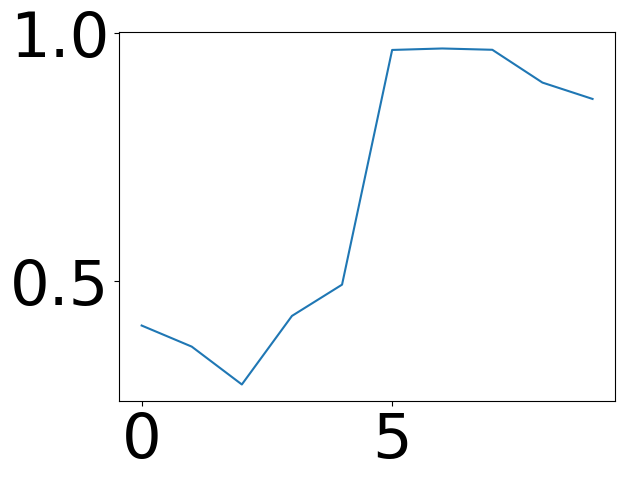

In [59]:
import matplotlib.pyplot as plt
scores = cross_val_score(gnb, x_train, y_train, cv=10, scoring="accuracy")
plt.plot(scores)
print(scores)
meanScore = scores.mean()
print(meanScore * 100)


In [60]:
errType = 'constant'
test_data = data[int(len(data)*0.8):] #data[end_index-1:end_index + 10]
test_data = test_data.reset_index()
supply_temp_test = test_data.drop(['OA_TEMP','ZONE_TEMP_1','ZONE_TEMP_2','ZONE_TEMP_3','ZONE_TEMP_4','ZONE_TEMP_5'], axis=1)
stuck_val = random.randint(16,32)
#print(stuck_val)

#FaultData, classification = simulateFault(supply_temp_test['supply_temp'], {'constant': 4, 'coeff':1.7, 'stuck': stuck_val,'bounds': [14,60]})

FaultData, classification = simulateSpecificFault(test_data['SA_TEMP'], errType, stuck_val)
supply_temp_test['supply_temp_BMS'] = FaultData
#supply_temp_test['classification'] = classification[2:len(classification)]
supply_temp_test['lag_1'] = supply_temp_test['SA_TEMP'].shift(1)
supply_temp_test['lag_2'] = supply_temp_test['supply_temp_BMS'].shift(1)
supply_temp_test['lag_3'] = supply_temp_test['SA_TEMP'].shift(2)
supply_temp_test['lag_4'] = supply_temp_test['supply_temp_BMS'].shift(2)
supply_temp_test['lag_5'] = supply_temp_test['SA_TEMP'].shift(3)
supply_temp_test['lag_6'] = supply_temp_test['supply_temp_BMS'].shift(3)
supply_temp_test = supply_temp_test[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6']]
supply_temp_test = supply_temp_test.dropna()
x_test = supply_temp_test[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6']]
y_test = classification[0:len(classification)-3]#supply_temp_test[['classification']]
x_test = x_test.reset_index(drop=True)
vectors, y_test = sample_vectors(x_test, i)

x_test = np.array(vectors)
y_test = np.array(y_test)

y_pred = gnb.predict(x_test)

#scores = cross_val_score(clf, np.concatenate((x_train, x_test), axis=0), np.concatenate((y_train, y_test), axis=0), cv=5)
#print(scores)
#target_names = ['No Fault', 'Offset', 'Gain', 'Stuck','Out of Bounds']

target_names = ['No Fault', 'Fault']
#print('FOR rate: ',i)
cnf_matrix = confusion_matrix(y_test, y_pred)
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=target_names))
column_sum = cnf_matrix.sum(axis = 1)
#print(column_sum)
acc.append(cnf_matrix[1][1] / column_sum[1])
# offset.append(cnf_matrix[1][1] / column_sum[1] )
# gain.append(cnf_matrix[2][2] / column_sum[2])
# stuck.append(cnf_matrix[3][3] / column_sum[3])
# out_bounds.append(cnf_matrix[3][3] / column_sum[3])

#print(acc)
#i = i + 0.1 

105105
              precision    recall  f1-score   support

    No Fault       1.00      0.99      0.99     94595
       Fault       0.89      1.00      0.94     10510

    accuracy                           0.99    105105
   macro avg       0.95      0.99      0.97    105105
weighted avg       0.99      0.99      0.99    105105



In [61]:
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test, y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print("Gaussian Naive Bayes model auc(in %):", metrics.auc(fpr, tpr)*100)
log_loss(y_test,  y_pred, eps=1e-15)
print("Number of mislabeled points out of a total %d points : %d"
         % (x_test.shape[0], (y_test != y_pred).sum()))

Gaussian Naive Bayes model accuracy(in %): 98.8059559488131
[[93340  1255]
 [    0 10510]]
Gaussian Naive Bayes model auc(in %): 99.33664570008986
Number of mislabeled points out of a total 105105 points : 1255


C:\Users\renat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


[0.92252023 0.92126692 0.92255795 ... 0.163037   0.1539988  0.09577196]


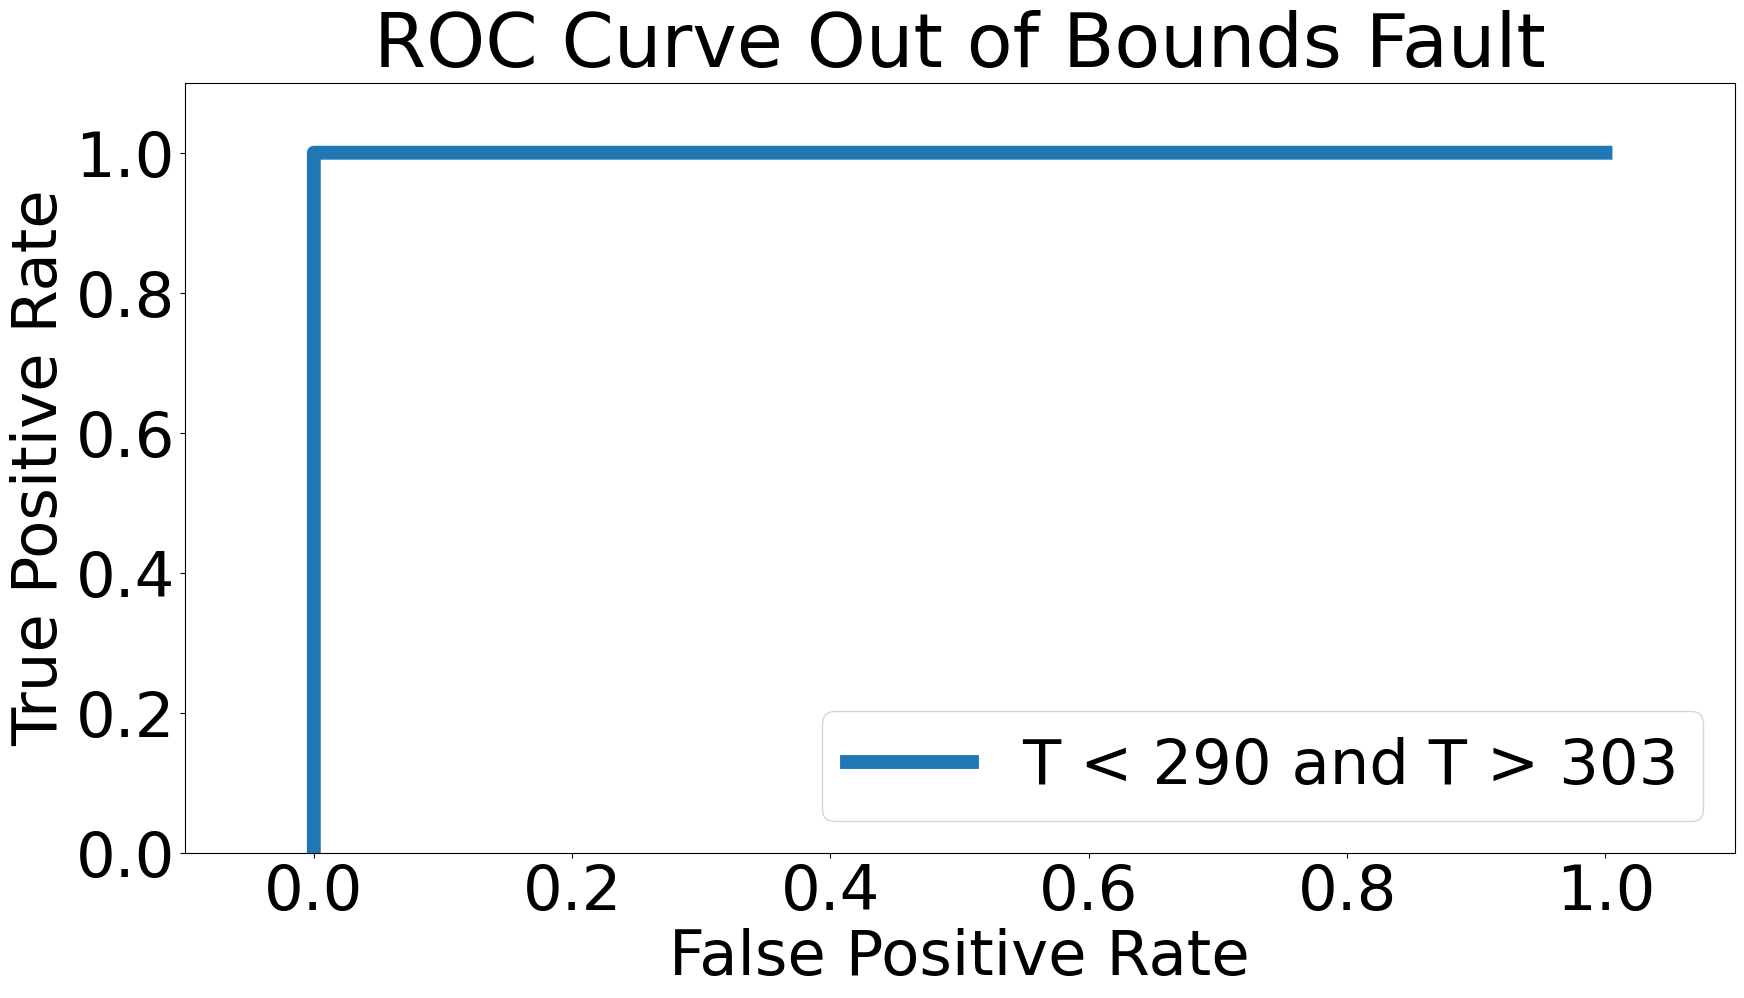

In [20]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
fpr = dict()
tpr = dict()
roc_auc = dict()
y_score = gnb.predict_proba(x_test)
#y_prob = clf.predict_proba(x_test)
print(y_score[:,1])
# print(clf.score(x_train, y_train, sample_weight=None))
# print(probs)
#for i in range(2):
fpr, tpr, te_thresholds = roc_curve(y_test, y_score[:,1])

# print(fpr[0])
# print(tpr[0])

plt.rcParams.update({'font.size': 45})
plt.figure(figsize=(20,10))
#plt.plot(fpr[1], tpr[1])
plt.plot(fpr, tpr,linewidth = 10, label = "T < 290 and T > 303")
plt.xlim([-0.1, 1.1])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Out of Bounds Fault')
plt.legend(loc="lower right")
plt.show()

In [68]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

In [69]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_transformed = scaler.fit_transform(x_train)
X_test_transformed = scaler.transform(x_test)
gbc=GradientBoostingClassifier(n_estimators=100,learning_rate=0.5,random_state=100,max_features=5)

In [70]:
gbc.fit(X_train_transformed, y_train)

GradientBoostingClassifier(learning_rate=0.5, max_features=5, random_state=100)

99.99347607440792


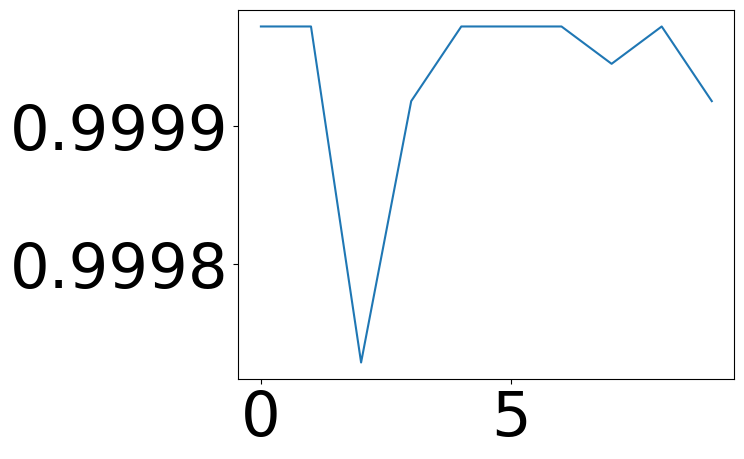

In [71]:

scores = cross_val_score(gbc, X_train_transformed, y_train, cv=10, scoring="accuracy")
plt.plot(scores)
meanScore = scores.mean()
print(meanScore * 100)

In [65]:
plt.plot(range(1,100), error_rates)

NameError: name 'error_rates' is not defined

In [66]:
model

NameError: name 'model' is not defined

In [67]:
gs_param_grid = {'max_depth': [3,4,5], 
                 'n_estimators' : [x for x in range(1,200)],
                 'learning_rate':[0.01,0.03,0.1]
                }
grid_gbm = GridSearchCV(estimator=GradientBoostingClassifier(), 
                        param_grid=gs_param_grid, 
                        scoring='neg_mean_squared_error', 
                        cv=4, 
                        verbose=1
                       )
grid_gbm.fit(X_train_transformed,y_train)

NameError: name 'X_train_transformed' is not defined

In [ ]:
y=[]
cvres = grid_gbm.cv_results_
best_md=grid_gbm.best_params_['max_depth']
la=gs_param_grid['learning_rate']
n_estimators=gs_param_grid['n_estimators']

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    if params["max_depth"]==best_md:
        y.append(np.sqrt(-mean_score))


y=np.array(y).reshape(len(la),len(n_estimators))

%matplotlib inline
plt.figure(figsize=(8,8))
for y_arr, label in zip(y, la):
    plt.plot(n_estimators, y_arr, label=label)

plt.title('Error for different learning rates(keeping max_depth=%d(best_param))'%best_md)
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Error')
plt.show()

In [26]:
y_pred = gbc.predict(X_test_transformed)

#scores = cross_val_score(clf, np.concatenate((x_train, x_test), axis=0), np.concatenate((y_train, y_test), axis=0), cv=5)
#print(scores)
#target_names = ['No Fault', 'Offset', 'Gain', 'Stuck','Out of Bounds']

target_names = ['No Fault', 'Fault']
#print('FOR rate: ',i)
cnf_matrix = confusion_matrix(y_test, y_pred)
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=target_names))
column_sum = cnf_matrix.sum(axis = 1)
#print(column_sum)
acc.append(cnf_matrix[1][1] / column_sum[1])
# offset.append(cnf_matrix[1][1] / column_sum[1] )
# gain.append(cnf_matrix[2][2] / column_sum[2])
# stuck.append(cnf_matrix[3][3] / column_sum[3])
# out_bounds.append(cnf_matrix[3][3] / column_sum[3])

#print(acc)
#i = i + 0.1 

              precision    recall  f1-score   support

    No Fault       1.00      0.98      0.99     94595
       Fault       0.87      1.00      0.93     10510

    accuracy                           0.98    105105
   macro avg       0.93      0.99      0.96    105105
weighted avg       0.99      0.98      0.98    105105



In [73]:
print("Boosted decision tree model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test, y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print("Boosted decision tree model auc(in %):", metrics.auc(fpr, tpr)*100)
log_loss(y_test,  y_pred, eps=1e-15)
print("Number of mislabeled points out of a total %d points : %d"
         % (x_test.shape[0], (y_test != y_pred).sum()))

Boosted decision tree model accuracy(in %): 98.8059559488131
[[93340  1255]
 [    0 10510]]
Boosted decision tree model auc(in %): 99.33664570008986
Number of mislabeled points out of a total 105105 points : 1255


[ 17.52784017  22.8478072   15.61779759 ... -11.92464687 -11.50656186
 -11.50656186]


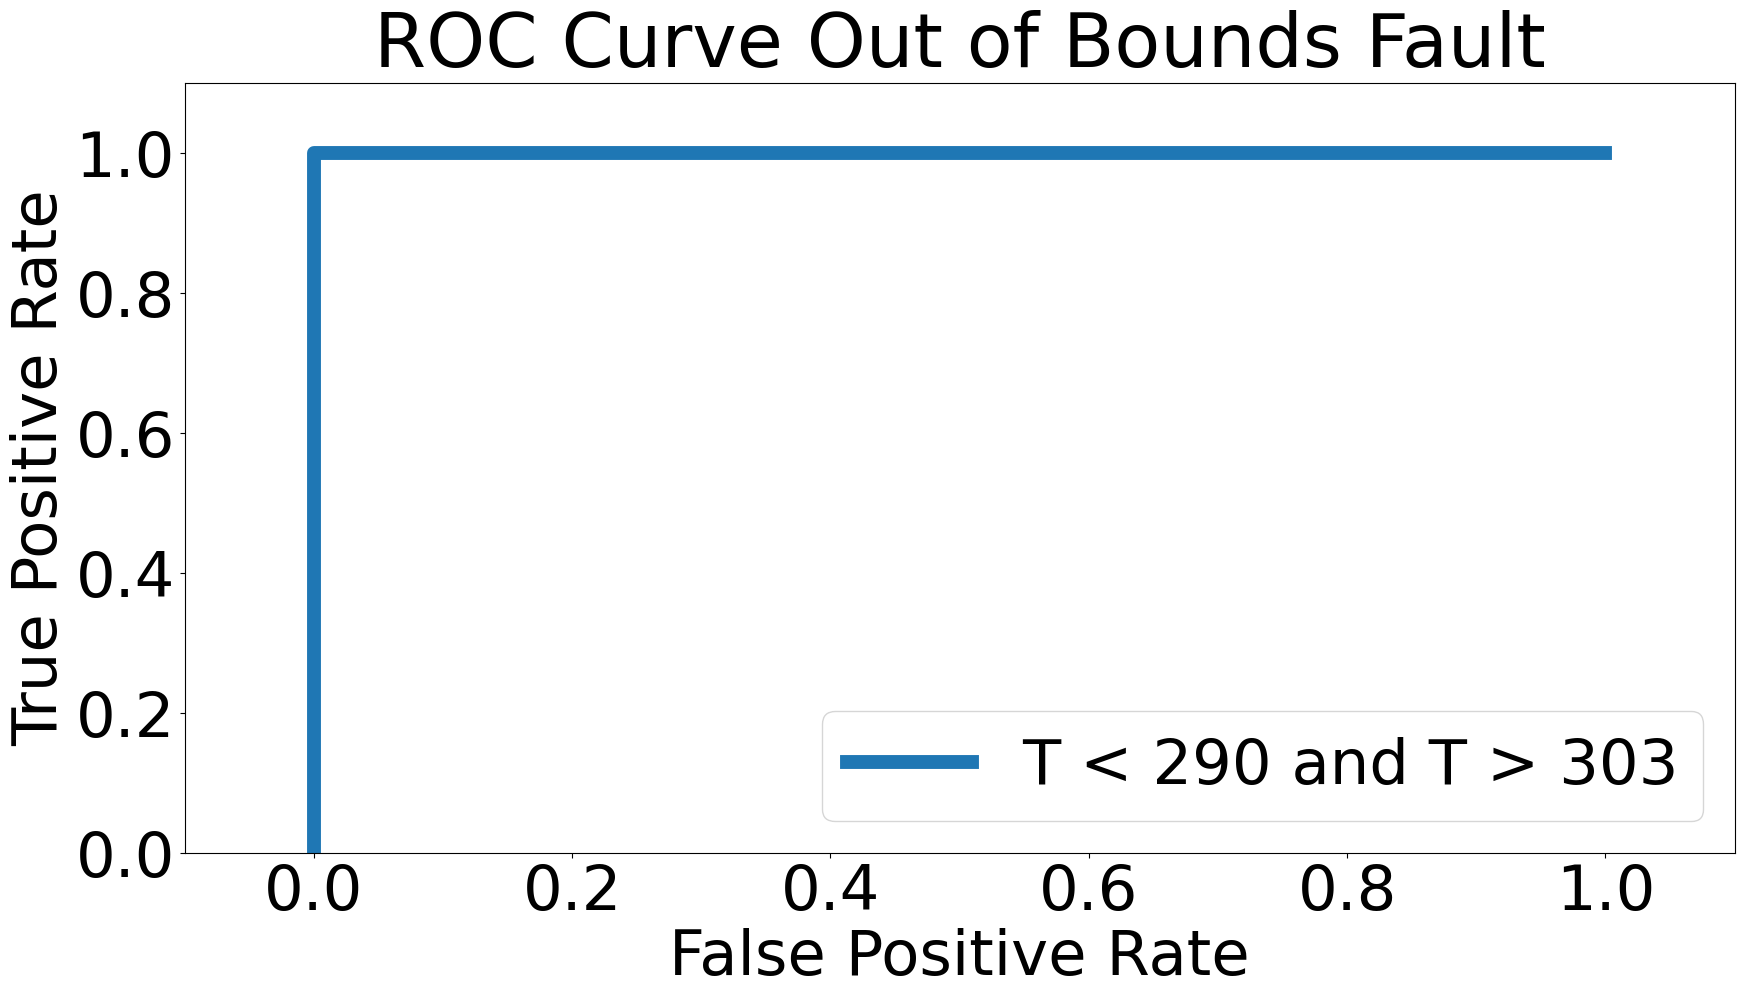

In [74]:
fpr = dict()
tpr = dict()
roc_auc = dict()
y_score = gbc.decision_function(X_test_transformed)
#y_prob = clf.predict_proba(x_test)
print(y_score)
# print(clf.score(x_train, y_train, sample_weight=None))
# print(probs)
#for i in range(2):
fpr, tpr, te_thresholds = roc_curve(y_test, y_score)

# print(fpr[0])
# print(tpr[0])

plt.rcParams.update({'font.size': 45})
plt.figure(figsize=(20,10))
#plt.plot(fpr[1], tpr[1])
plt.plot(fpr, tpr,linewidth = 10, label = "T < 290 and T > 303")
plt.xlim([-0.1, 1.1])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Out of Bounds Fault')
plt.legend(loc="lower right")
plt.show()

In [75]:
pipeline.fit(X_train_transformed, y_train)
#
# Model scores on test and training data
#
print('Model test Score: %.3f, ' %pipeline.score(X_test_transformed, y_test),
      'Model training Score: %.3f' %pipeline.score(X_train_transformed, y_train))

NameError: name 'pipeline' is not defined

In [76]:
pipeline = make_pipeline(StandardScaler(),
                        LogisticRegression(random_state=1))

bgclassifier = BaggingClassifier(base_estimator = DecisionTreeClassifier(), n_estimators = 100, random_state = 10)

In [82]:
bgclassifier.fit(X_train_transformed, y_train)
#
# Model scores on test and training data
#
print('Model test Score: %.3f, ' %bgclassifier.score(X_test_transformed, y_test),
      'Model training Score: %.3f' %bgclassifier.score(X_train_transformed, y_train))

Model test Score: 0.993,  Model training Score: 1.000


In [83]:
results = cross_val_score(bgclassifier, X_train_transformed, y_train, cv=10)
print(results.mean())

0.9999347609657562


In [84]:
print(confusion_matrix(y_test, bgclassifier.predict(X_test_transformed)))

[[93858   737]
 [    0 10510]]


In [85]:
y_pred = bgclassifier.predict(X_test_transformed)

#scores = cross_val_score(clf, np.concatenate((x_train, x_test), axis=0), np.concatenate((y_train, y_test), axis=0), cv=5)
#print(scores)
#target_names = ['No Fault', 'Offset', 'Gain', 'Stuck','Out of Bounds']

target_names = ['No Fault', 'Fault']
#print('FOR rate: ',i)
cnf_matrix = confusion_matrix(y_test, y_pred)
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=target_names))
column_sum = cnf_matrix.sum(axis = 1)
#print(column_sum)
acc.append(cnf_matrix[1][1] / column_sum[1])
# offset.append(cnf_matrix[1][1] / column_sum[1] )
# gain.append(cnf_matrix[2][2] / column_sum[2])
# stuck.append(cnf_matrix[3][3] / column_sum[3])
# out_bounds.append(cnf_matrix[3][3] / column_sum[3])

#print(acc)
#i = i + 0.1 

              precision    recall  f1-score   support

    No Fault       1.00      0.99      1.00     94595
       Fault       0.93      1.00      0.97     10510

    accuracy                           0.99    105105
   macro avg       0.97      1.00      0.98    105105
weighted avg       0.99      0.99      0.99    105105



[1 1 1 ... 0 0 0]


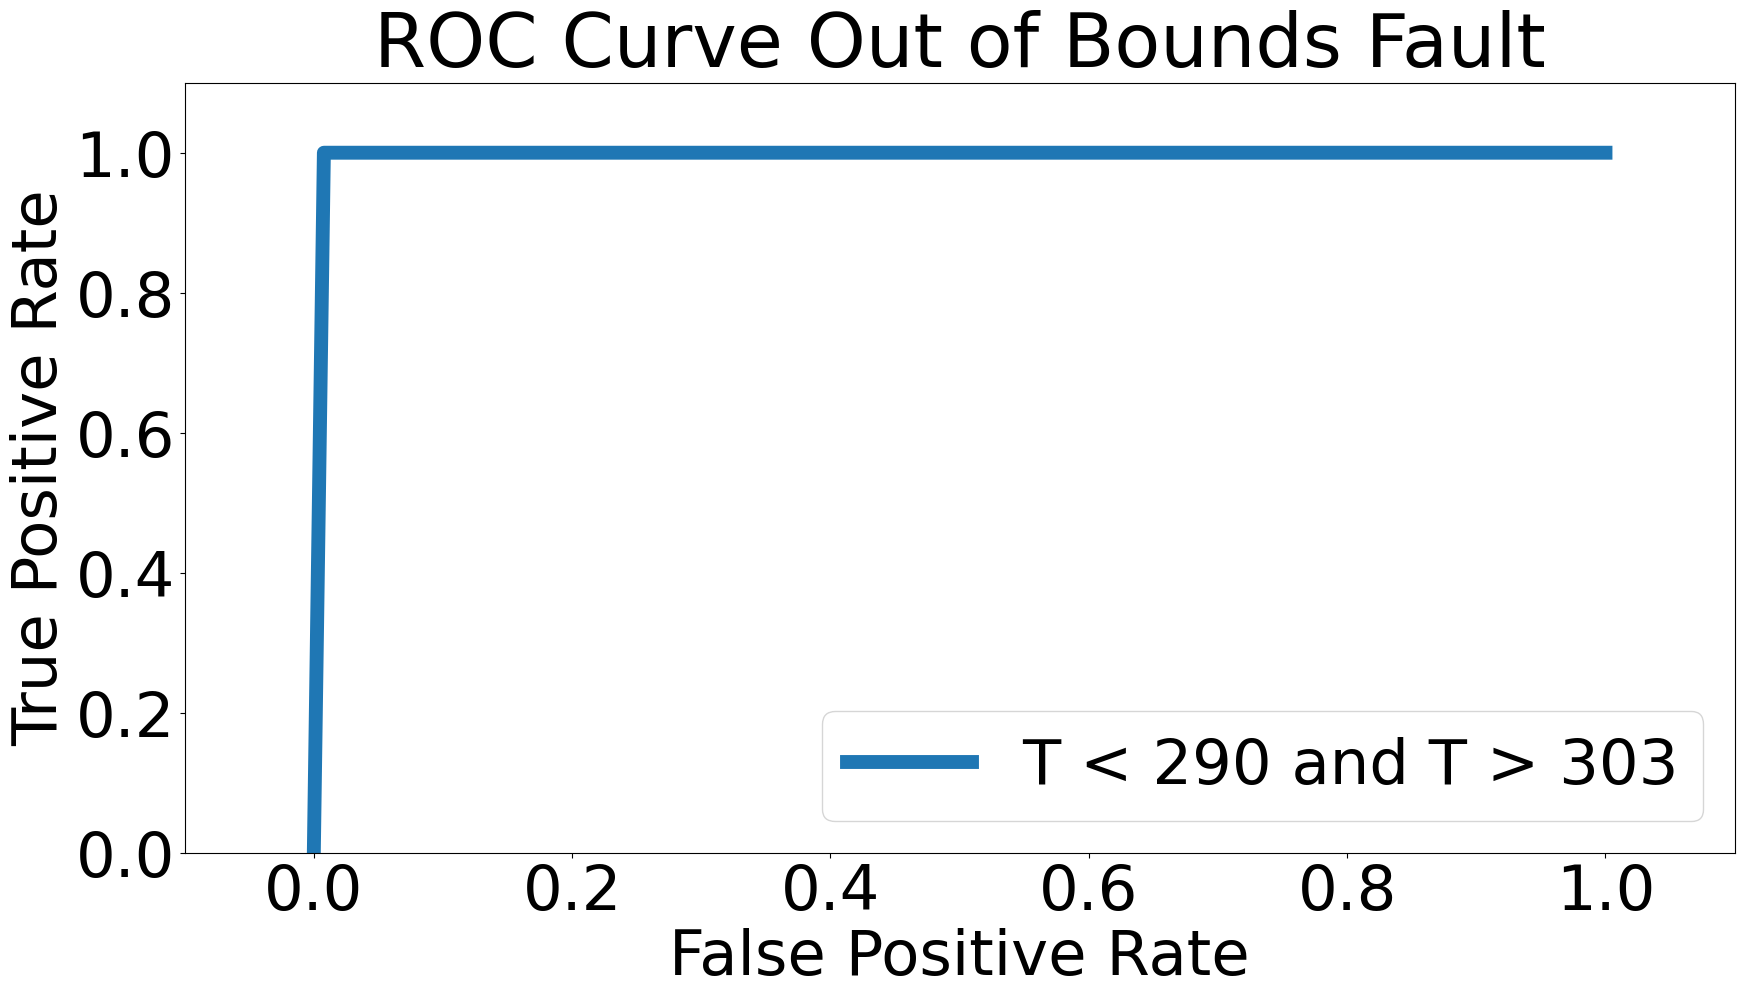

In [86]:
fpr = dict()
tpr = dict()
roc_auc = dict()
y_score = bgclassifier.predict(X_test_transformed)
#y_prob = clf.predict_proba(x_test)
print(y_score)
# print(clf.score(x_train, y_train, sample_weight=None))
# print(probs)
#for i in range(2):
fpr, tpr, te_thresholds = roc_curve(y_test, y_score)

# print(fpr[0])
# print(tpr[0])

plt.rcParams.update({'font.size': 45})
plt.figure(figsize=(20,10))
#plt.plot(fpr[1], tpr[1])
plt.plot(fpr, tpr,linewidth = 10, label = "T < 290 and T > 303")
plt.xlim([-0.1, 1.1])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Out of Bounds Fault')
plt.legend(loc="lower right")
plt.show()

In [87]:
print("Bagging decision tree model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test, y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print("Baggging decision tree model auc(in %):", metrics.auc(fpr, tpr)*100)
loss = log_loss(y_test,  y_pred, eps=1e-15)
print(loss)
print("Number of mislabeled points out of a total %d points : %d"
         % (x_test.shape[0], (y_test != y_pred).sum()))

Bagging decision tree model accuracy(in %): 99.29879644165358
[[93858   737]
 [    0 10510]]
Baggging decision tree model auc(in %): 99.61044452666631
0.24219273589605944
Number of mislabeled points out of a total 105105 points : 737


In [52]:
scores = cross_val_score(DecisionTreeClassifier(), X_train_transformed, y_train, cv=10)
scores.mean()

0.9996901147166539

In [53]:
from sklearn.metrics import mean_squared_error

In [54]:
mean_squared_error(y_test, bgclassifier.predict(X_test_transformed))

0.006241377669949098

ValueError: Unrecognized character B in format string

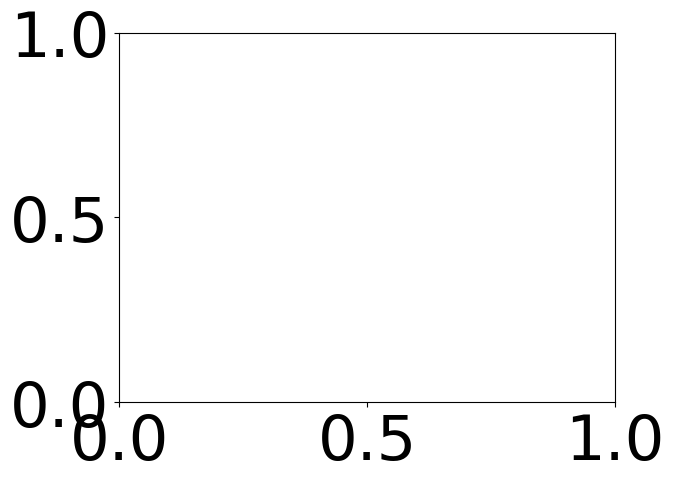

In [55]:
plt.plot(scores,"Bagging decision trees",linewidth = 1, label = "T < 290 and T > 303")

In [56]:
results = []
max_depth_options = [2,4,6,8,10,12,14,16,18,20]
for trees in max_depth_options:
    model = bgClassifier(max_depth=trees, random_state=101)
    model.fit(x_train_transformed, y_train)
    y_pred = model.predict(x_tes)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, max_depth_options).plot(color="darkred",marker="o")

NameError: name 'bgClassifier' is not defined

In [29]:
def physical_model(zone,errType, value):
    tpr_list = []
    fpr_list = []

    for i in range(0,3):

        #load data and preprocess it 

        train = data[0:int(len(data)*0.8)] 
        inputs, output = define_vectors(train,zone)

        inputs = pd.DataFrame(data = inputs)
        output = pd.DataFrame(data = output)

        test = data[int(len(data)*0.8):] 
        test = test.reset_index()
        test['SA_TEMP'],test_label = simulateSpecificFault(test['SA_TEMP'], errType, value)
        inputs_test, output_test = define_vectors(test, zone)

        temporal_difference = prepare_temporal_difference_vector(zone,test)
        temporal_difference = temporal_difference.reset_index()

        inputs_test = pd.DataFrame(data = inputs_test)
        output_test = pd.DataFrame(data = output_test)

        scaler = StandardScaler()
        scaler1 = StandardScaler()
        inputs_scaled = scaler.fit_transform(inputs)
        output_scaled = scaler1.fit_transform(output)
        inputs_test_scaled = scaler.transform(inputs_test)

        inputs_with_constant = sm.add_constant(inputs)
        model = sm.OLS(output_scaled,inputs_with_constant)
        results = model.fit()

        pred_array, true_array = calculate_zone_temp(zone,results.params['x2'],results.params['const'],train)
        err = np.sqrt(mse(true_array, pred_array))
        pred_array, true_array = calculate_zone_temp(zone,results.params['x2'],results.params['const'],test)

        upper_bound = []
        lower_bound = []

        upper_bound = pred_array 
        lower_bound = pred_array 
        bounds = test[1:]
        bounds = bounds.reset_index()
        bounds['upper'] = upper_bound + err
        bounds['lower'] = lower_bound - err
        bounds['pred'] = pred_array
        bounds['classification'] = test_label[1:]
        bounds = bounds.dropna()
        bounds = bounds.reset_index()

        tpr, fpr = compute_TPR_FPR(zone,err, bounds, temporal_difference)
        tpr_list.append(tpr)
        fpr_list.append(fpr)

        value = value + value
        
    return tpr_list, fpr_list

In [51]:
def pre_trained_NB_Classifier(errorType, constant, coeff,cg, time_gain, stuck_val):
    acc = []
    offset = []
    gain = []
    stuck = []
    out_bounds = []
    i=0.1

    supply_temp_train = train_data.drop(['RA_TEMP','OA_TEMP', 'MA_TEMP','ZONE_TEMP_1','ZONE_TEMP_2','ZONE_TEMP_3','ZONE_TEMP_4','ZONE_TEMP_5'], axis=1)
    #stuck_val = random.randint(16,32)
    #print(stuck_val)

    FaultData, classification = simulateFault(supply_temp_train['SA_TEMP'],{'constant': constant, 'coeff': coeff, 'cg':cg,'varing time gain': time_gain,'stuck': stuck_val, 'bounds': [14,60]})
    #print(classification)
    supply_temp_train['supply_temp_BMS'] = FaultData
    supply_temp_train['lag_1'] = supply_temp_train['SA_TEMP'].shift(1)
    supply_temp_train['lag_2'] = supply_temp_train['supply_temp_BMS'].shift(1)
    supply_temp_train['lag_3'] = supply_temp_train['SA_TEMP'].shift(2)
    supply_temp_train['lag_4'] = supply_temp_train['supply_temp_BMS'].shift(2)
    supply_temp_train['lag_5'] = supply_temp_train['SA_TEMP'].shift(3)
    supply_temp_train['lag_6'] = supply_temp_train['supply_temp_BMS'].shift(3)
    supply_temp_train = supply_temp_train[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6']]
    supply_temp_train = supply_temp_train.dropna()
    x_train = supply_temp_train[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6']]
    y_train = classification[0:len(classification)-3]#supply_temp_train[['classification']]

    gnb = GaussianNB()
    gnb.fit(x_train, y_train)
    
    #errType = 'constant'
    test_data = data[int(len(data)*0.8):]
    test_data = test_data.reset_index()
    supply_temp_test = test_data.drop(['RA_TEMP','OA_TEMP', 'MA_TEMP','ZONE_TEMP_1','ZONE_TEMP_2','ZONE_TEMP_3','ZONE_TEMP_4','ZONE_TEMP_5'], axis=1)
    stuck_val = random.randint(16,32)

    FaultData, classification = simulateSpecificFault(test_data['SA_TEMP'], errorType, 10)
    supply_temp_test['supply_temp_BMS'] = FaultData
    supply_temp_test['lag_1'] = supply_temp_test['SA_TEMP'].shift(1)
    supply_temp_test['lag_2'] = supply_temp_test['supply_temp_BMS'].shift(1)
    supply_temp_test['lag_3'] = supply_temp_test['SA_TEMP'].shift(2)
    supply_temp_test['lag_4'] = supply_temp_test['supply_temp_BMS'].shift(2)
    supply_temp_test['lag_5'] = supply_temp_test['SA_TEMP'].shift(3)
    supply_temp_test['lag_6'] = supply_temp_test['supply_temp_BMS'].shift(3)
    supply_temp_test = supply_temp_test[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6']]
    supply_temp_test = supply_temp_test.dropna()
    x_test = supply_temp_test[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6']]
    y_test = classification[0:len(classification)-3]

    x_test = np.array(x_test)
    y_test = np.array(y_test)
    y_pred = gnb.predict(x_test)
    
    scores = cross_val_score(gnb, x_train, y_train, cv=10, scoring="accuracy")
    print(scores.mean()*100)
    print("Boosted decision tree model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
    print(confusion_matrix(y_test, y_pred))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    print("Boosted decision tree model auc(in %):", metrics.auc(fpr, tpr)*100)
    log_loss(y_test,  y_pred, eps=1e-15)
    print("Number of mislabeled points out of a total %d points : %d"
         % (x_test.shape[0], (y_test != y_pred).sum()))
    print("Mean squared error: ",mse(y_test, y_pred)*100)
    target_names = ['No Fault', 'Fault']
    cnf_matrix = confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred, target_names=target_names))
    column_sum = cnf_matrix.sum(axis = 1)
    acc.append(cnf_matrix[1][1] / column_sum[1])
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    y_score = gnb.predict(x_test)
    fpr, tpr, te_thresholds = roc_curve(y_test, y_pred)
    
    return tpr, fpr

In [52]:
#phys_tpr, phys_fpr = physical_model('ZONE_TEMP_1','constant', 5)

In [31]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
# f = class_fpr - 0.02
# t = class_tpr + 0.03
#print(ann_tpr)
plt.figure()
plt.rcParams.update({'font.size': 45})
plt.figure(figsize=(20,10))
plt.plot(phys_fpr[1], phys_tpr[1], linewidth = 10, label = "Physical Model",linestyle = '--')
#plt.plot(class_fpr, class_tpr, linewidth = 10, label = "SVM classifier")
#plt.plot(ann_fpr[2], ann_tpr[2], linewidth = 10, label = "SVR Model", linestyle=':', marker='o')
plt.xticks(np.arange(0, 1.0, step=0.2))
plt.yticks(np.arange(0, 1.0, step=0.2))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Offset Fault: +10K')
plt.legend(loc="lower right")
plt.show()
import seaborn as sns

NameError: name 'phys_fpr' is not defined

<Figure size 640x480 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

In [89]:
i= 0.1
stuck_val = random.randint(16,32)
print(stuck_val)
cg = np.asarray([1.0,1.0])
time_gain = np.asarray([1.0,1.0])
class_nb_tpr, class_nb_fpr = pre_trained_NB_Classifier('constant', 10.0, 1.05, cg, time_gain, stuck_val)

26
52.30116728565151
Boosted decision tree model accuracy(in %): 52.961324389895815
[[50032  2519]
 [46921  5633]]
Boosted decision tree model auc(in %): 52.962530156446086
Number of mislabeled points out of a total 105105 points : 49440
Mean squared error:  47.03867561010418
              precision    recall  f1-score   support

    No Fault       0.52      0.95      0.67     52551
       Fault       0.69      0.11      0.19     52554

    accuracy                           0.53    105105
   macro avg       0.60      0.53      0.43    105105
weighted avg       0.60      0.53      0.43    105105



<Figure size 640x480 with 0 Axes>

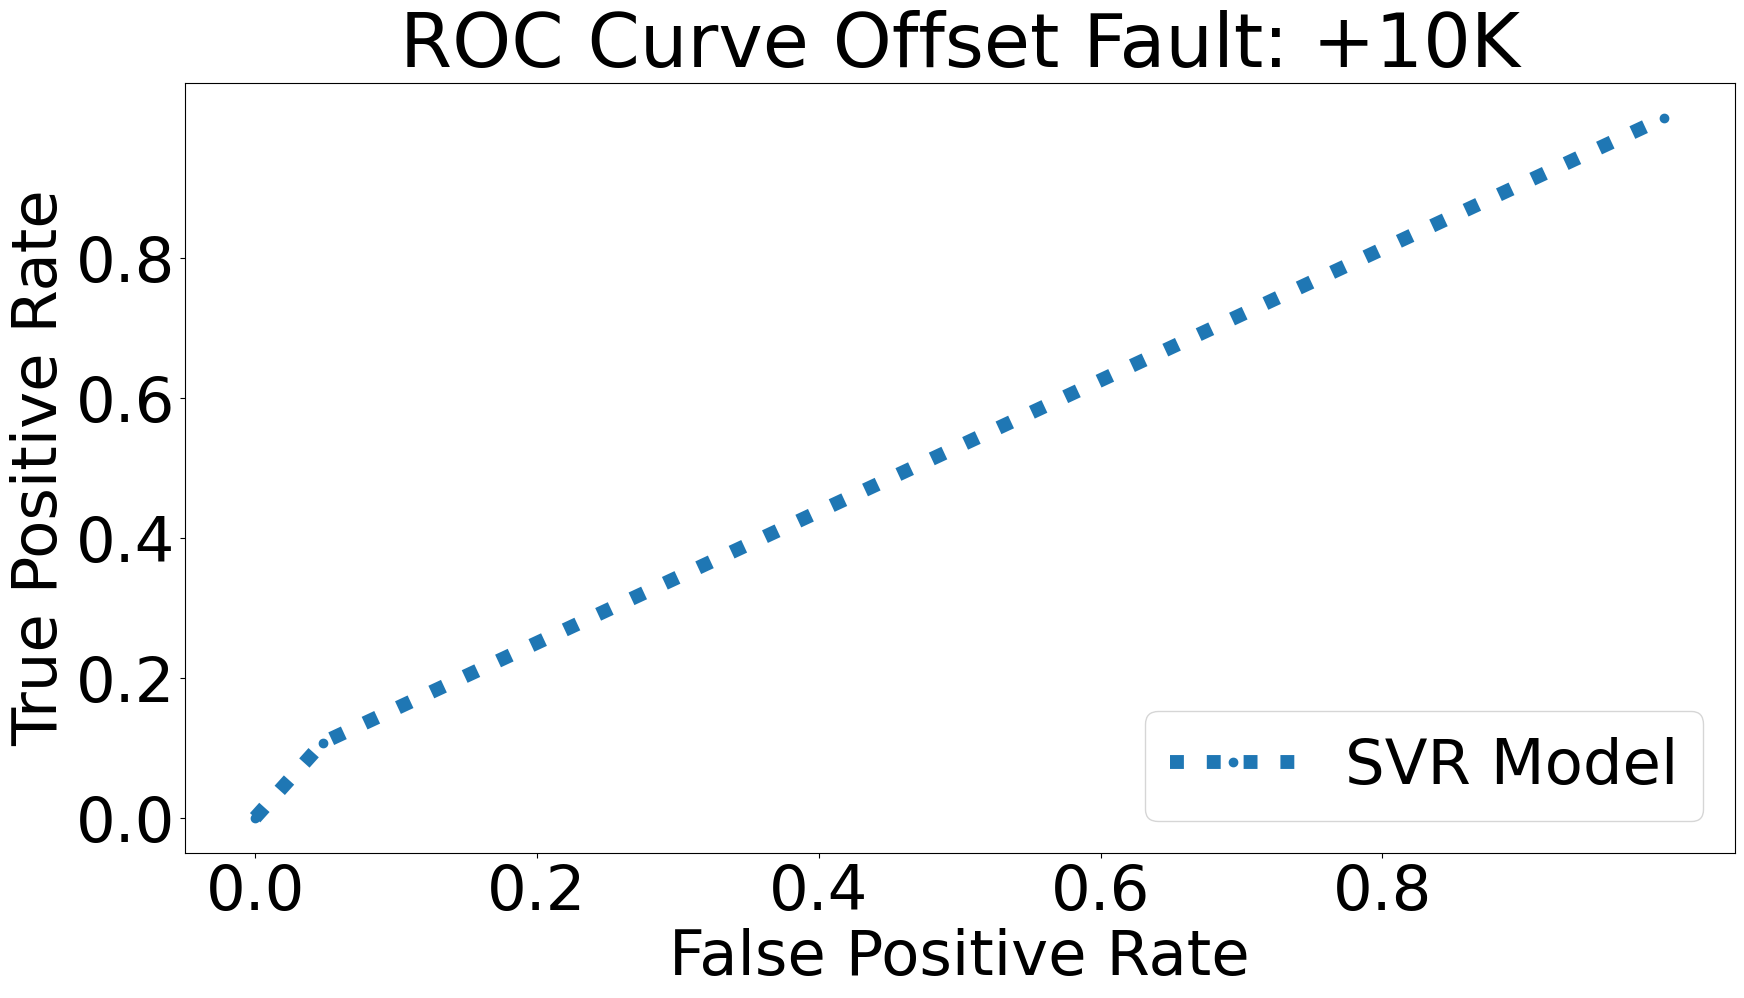

In [90]:
plt.figure()
plt.rcParams.update({'font.size': 45})
plt.figure(figsize=(20,10))
#plt.plot(phys_fpr[1], phys_tpr[1], linewidth = 10, label = "Physical Model",linestyle = '--')
#plt.plot(f, t, linewidth = 10, label = "SVM classifier")
plt.plot(class_nb_fpr,class_nb_tpr, linewidth = 10, label = "SVR Model", linestyle=':', marker='o')
plt.xticks(np.arange(0, 1.0, step=0.2))
plt.yticks(np.arange(0, 1.0, step=0.2))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Offset Fault: +10K')
plt.legend(loc="lower right")
plt.show()
from sklearn.preprocessing import MinMaxScaler

In [91]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

In [92]:
def pre_trained_GBC_Classifier(errorType, constant, coeff,cg, time_gain, stuck_va):
    acc = []
    offset = []
    gain = []
    stuck = []
    out_bounds = []


    

    supply_temp_train = train_data.drop(['RA_TEMP','OA_TEMP', 'MA_TEMP','ZONE_TEMP_1','ZONE_TEMP_2','ZONE_TEMP_3','ZONE_TEMP_4','ZONE_TEMP_5'], axis=1)
    #stuck_val = random.randint(16,32)
    #print(stuck_val)

    FaultData, classification = simulateFault(supply_temp_train['SA_TEMP'],{'constant': constant, 'coeff': coeff, 'cg':cg,'varing time gain': time_gain,'stuck': stuck_va, 'bounds': [14,60]})
    #print(classification)
    supply_temp_train['supply_temp_BMS'] = FaultData
    supply_temp_train['lag_1'] = supply_temp_train['SA_TEMP'].shift(1)
    supply_temp_train['lag_2'] = supply_temp_train['supply_temp_BMS'].shift(1)
    supply_temp_train['lag_3'] = supply_temp_train['SA_TEMP'].shift(2)
    supply_temp_train['lag_4'] = supply_temp_train['supply_temp_BMS'].shift(2)
    supply_temp_train['lag_5'] = supply_temp_train['SA_TEMP'].shift(3)
    supply_temp_train['lag_6'] = supply_temp_train['supply_temp_BMS'].shift(3)
    supply_temp_train = supply_temp_train[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6']]
    supply_temp_train = supply_temp_train.dropna()
    x_train = supply_temp_train[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6']]
    y_train = classification[0:len(classification)-3]

    scaler = MinMaxScaler()
    X_train_transformed = scaler.fit_transform(x_train)
    gbc=GradientBoostingClassifier(n_estimators=100,learning_rate=0.5,random_state=100,max_features=5)
    gbc.fit(X_train_transformed, y_train)
    
    

    test_data = data[int(len(data)*0.8):] #data[end_index-1:end_index + 10]
    test_data = test_data.reset_index()
    supply_temp_test = test_data.drop(['OA_TEMP','ZONE_TEMP_1','ZONE_TEMP_2','ZONE_TEMP_3','ZONE_TEMP_4','ZONE_TEMP_5'], axis=1)
    stuck_val = random.randint(16,32)
    #print(stuck_val)

    #FaultData, classification = simulateFault(supply_temp_test['supply_temp'], {'constant': 4, 'coeff':1.7, 'stuck': stuck_val,'bounds': [14,60]})

    FaultData, classification = simulateSpecificFault(test_data['SA_TEMP'], errorType, constant)
    supply_temp_test['supply_temp_BMS'] = FaultData
    #supply_temp_test['classification'] = classification[2:len(classification)]
    supply_temp_test['lag_1'] = supply_temp_test['SA_TEMP'].shift(1)
    supply_temp_test['lag_2'] = supply_temp_test['supply_temp_BMS'].shift(1)
    supply_temp_test['lag_3'] = supply_temp_test['SA_TEMP'].shift(2)
    supply_temp_test['lag_4'] = supply_temp_test['supply_temp_BMS'].shift(2)
    supply_temp_test['lag_5'] = supply_temp_test['SA_TEMP'].shift(3)
    supply_temp_test['lag_6'] = supply_temp_test['supply_temp_BMS'].shift(3)
    supply_temp_test = supply_temp_test[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6']]
    supply_temp_test = supply_temp_test.dropna()
    x_test = supply_temp_test[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6']]
    y_test = classification[0:len(classification)-3]#supply_temp_test[['classification']]
    x_test = x_test.reset_index(drop=True)
    vectors, y_test = sample_vectors(x_test, i)

    x_test = np.array(vectors)
    y_test = np.array(y_test)
    X_test_transformed = scaler.transform(x_test)
    
    y_pred = gbc.predict(X_test_transformed)

    #scores = cross_val_score(clf, np.concatenate((x_train, x_test), axis=0), np.concatenate((y_train, y_test), axis=0), cv=5)
    #print(scores)
    #target_names = ['No Fault', 'Offset', 'Gain', 'Stuck','Out of Bounds']
    scores = cross_val_score(gbc, x_train, y_train, cv=10, scoring="accuracy")
    print(scores.mean()*100)
    print("Boosted decision tree model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    print("Boosted decision tree model auc(in %):", metrics.auc(fpr, tpr)*100)
    #log_loss(y_test,  y_pred, eps=1e-15)
    print("Number of mislabeled points out of a total %d points : %d"
         % (x_test.shape[0], (y_test != y_pred).sum()))
    print("Mean squared error: ",mse(y_test, y_pred)*100)
    target_names = ['No Fault', 'Fault']
    #print('FOR rate: ',i)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    #print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=target_names))
    column_sum = cnf_matrix.sum(axis = 1)
    #print(column_sum)
    acc.append(cnf_matrix[1][1] / column_sum[1])
    fig, ax = plt.subplots(figsize=(13, 6))
    means = -scores.mean()
    errors = scores.std()
    means.plot.barh(xerr=errors, ax=ax)
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    y_score = gbc.decision_function(X_test_transformed)
    fpr, tpr, te_thresholds = roc_curve(y_test, y_score)
    
    return tpr, fpr

22
105105
95.46253579925252
Boosted decision tree model accuracy(in %): 34.57494886066315
Boosted decision tree model auc(in %): 63.602195830197836
Number of mislabeled points out of a total 105105 points : 68765
Mean squared error:  65.42505113933686
              precision    recall  f1-score   support

    No Fault       1.00      0.27      0.43     94595
       Fault       0.13      1.00      0.23     10510

    accuracy                           0.35    105105
   macro avg       0.57      0.64      0.33    105105
weighted avg       0.91      0.35      0.41    105105



AttributeError: 'numpy.float64' object has no attribute 'plot'

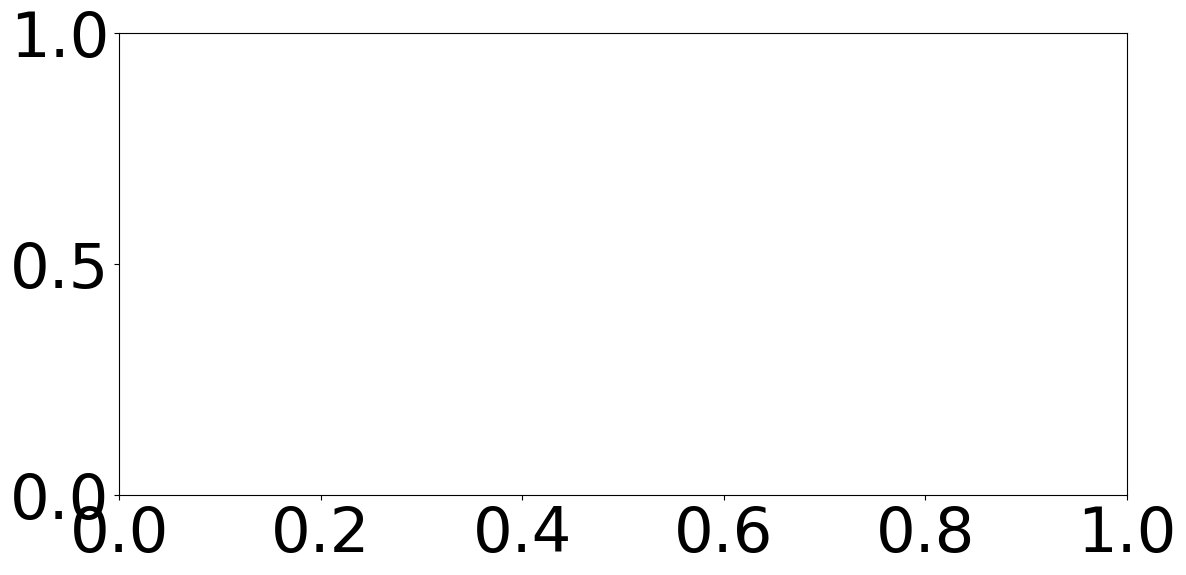

In [93]:
stuck_val = random.randint(16,32)
print(stuck_val)
cg = np.asarray([10.0,1.05])
time_gain = np.asarray([1.0,1.0])
class_gcb_tpr, class_gcb_fpr = pre_trained_GBC_Classifier('constant', 10.0, 1.05, cg, time_gain, stuck_val)

In [88]:
plt.figure()
plt.rcParams.update({'font.size': 45})
plt.figure(figsize=(20,10))
#plt.plot(phys_fpr[1], phys_tpr[1], linewidth = 10, label = "Physical Model",linestyle = '--')
#plt.plot(f, t, linewidth = 10, label = "SVM classifier")
plt.plot(class_gcb_fpr,class_gcb_tpr, linewidth = 10, label = "Boosted Model", linestyle=':', marker='o')
plt.xticks(np.arange(0, 1.0, step=0.2))
plt.yticks(np.arange(0, 1.0, step=0.2))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Offset Fault: +10K')
plt.legend(loc="lower right")
plt.show()

NameError: name 'class_gcb_fpr' is not defined

<Figure size 640x480 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

In [195]:
def pre_trained_BGC_Classifier(errorType, constant, coeff,cg, time_gain, stuck_va):
    acc = []
    offset = []
    gain = []
    stuck = []
    out_bounds = []


    supply_temp_train = train_data.drop(['RA_TEMP','OA_TEMP', 'MA_TEMP','ZONE_TEMP_1','ZONE_TEMP_2','ZONE_TEMP_3','ZONE_TEMP_4','ZONE_TEMP_5'], axis=1)
    #stuck_val = random.randint(16,32)
    #print(stuck_val)

    FaultData, classification = simulateFault(supply_temp_train['SA_TEMP'],{'constant': constant, 'coeff': coeff, 'cg':cg,'varing time gain': time_gain,'stuck': stuck_va, 'bounds': [14,60]})
    #print(classification)
    supply_temp_train['supply_temp_BMS'] = FaultData
    supply_temp_train['lag_1'] = supply_temp_train['SA_TEMP'].shift(1)
    supply_temp_train['lag_2'] = supply_temp_train['supply_temp_BMS'].shift(1)
    supply_temp_train['lag_3'] = supply_temp_train['SA_TEMP'].shift(2)
    supply_temp_train['lag_4'] = supply_temp_train['supply_temp_BMS'].shift(2)
    supply_temp_train['lag_5'] = supply_temp_train['SA_TEMP'].shift(3)
    supply_temp_train['lag_6'] = supply_temp_train['supply_temp_BMS'].shift(3)
    supply_temp_train = supply_temp_train[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6']]
    supply_temp_train = supply_temp_train.dropna()
    x_train = supply_temp_train[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6']]
    y_train = classification[0:len(classification)-3]

    bgclassifier = BaggingClassifier(base_estimator = DecisionTreeClassifier(), n_estimators = 100, random_state = 10)
    bgclassifier.fit(X_train_transformed, y_train)
    
    test_data = data[int(len(data)*0.8):] #data[end_index-1:end_index + 10]
    test_data = test_data.reset_index()
    supply_temp_test = test_data.drop(['OA_TEMP','ZONE_TEMP_1','ZONE_TEMP_2','ZONE_TEMP_3','ZONE_TEMP_4','ZONE_TEMP_5'], axis=1)
    stuck_val = random.randint(16,32)
    #print(stuck_val)

    #FaultData, classification = simulateFault(supply_temp_test['supply_temp'], {'constant': 4, 'coeff':1.7, 'stuck': stuck_val,'bounds': [14,60]})

    FaultData, classification = simulateSpecificFault(test_data['SA_TEMP'], errorType, constant,)
    supply_temp_test['supply_temp_BMS'] = FaultData
    #supply_temp_test['classification'] = classification[2:len(classification)]
    supply_temp_test['lag_1'] = supply_temp_test['SA_TEMP'].shift(1)
    supply_temp_test['lag_2'] = supply_temp_test['supply_temp_BMS'].shift(1)
    supply_temp_test['lag_3'] = supply_temp_test['SA_TEMP'].shift(2)
    supply_temp_test['lag_4'] = supply_temp_test['supply_temp_BMS'].shift(2)
    supply_temp_test['lag_5'] = supply_temp_test['SA_TEMP'].shift(3)
    supply_temp_test['lag_6'] = supply_temp_test['supply_temp_BMS'].shift(3)
    supply_temp_test = supply_temp_test[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6']]
    supply_temp_test = supply_temp_test.dropna()
    x_test = supply_temp_test[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6']]
    y_test = classification[0:len(classification)-3]#supply_temp_test[['classification']]
    x_test = x_test.reset_index(drop=True)
    vectors, y_test = sample_vectors(x_test, i)

    x_test = np.array(vectors)
    y_test = np.array(y_test)

    y_pred = bgclassifier.predict(X_test_transformed)

    #scores = cross_val_score(clf, np.concatenate((x_train, x_test), axis=0), np.concatenate((y_train, y_test), axis=0), cv=5)
    #print(scores)
    #target_names = ['No Fault', 'Offset', 'Gain', 'Stuck','Out of Bounds']
    scores = cross_val_score(bgclassifier, x_train, y_train, cv=10, scoring="accuracy")
    print(scores.mean()*100)
    print("Boosted decision tree model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
    print(confusion_matrix(y_test, y_pred))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    print("Boosted decision tree model auc(in %):", metrics.auc(fpr, tpr)*100)
    log_loss(y_test,  y_pred, eps=1e-15)
    print("Number of mislabeled points out of a total %d points : %d"
         % (x_test.shape[0], (y_test != y_pred).sum()))
    print("Mean squared error %d",mean_squared_error(y_test, bgclassifier.predict(X_test_transformed))*100)
    target_names = ['No Fault', 'Fault']
    #print('FOR rate: ',i)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    #print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=target_names))
    column_sum = cnf_matrix.sum(axis = 1)
    #print(column_sum)
    acc.append(cnf_matrix[1][1] / column_sum[1])
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    y_score = bgclassifier.predict(X_test_transformed)
    fpr, tpr, te_thresholds = roc_curve(y_test, y_score)
    
    return tpr, fpr

In [196]:
from sklearn.svm 

In [201]:
def pre_trained_svm_Classifier(errorType, constant, coeff,cg, time_gain, stuck_va):
    acc = []
    offset = []
    gain = []
    stuck = []
    out_bounds = []


    supply_temp_train = train_data.drop(['RA_TEMP','OA_TEMP', 'MA_TEMP','ZONE_TEMP_1','ZONE_TEMP_2','ZONE_TEMP_3','ZONE_TEMP_4','ZONE_TEMP_5'], axis=1)
    #stuck_val = random.randint(16,32)
    #print(stuck_val)

    FaultData, classification = simulateFault(supply_temp_train['SA_TEMP'],{'constant': constant, 'coeff': coeff, 'cg':cg,'varing time gain': time_gain,'stuck': stuck_va, 'bounds': [14,60]})
    #print(classification)
    supply_temp_train['supply_temp_BMS'] = FaultData
    supply_temp_train['lag_1'] = supply_temp_train['SA_TEMP'].shift(1)
    supply_temp_train['lag_2'] = supply_temp_train['supply_temp_BMS'].shift(1)
    supply_temp_train['lag_3'] = supply_temp_train['SA_TEMP'].shift(2)
    supply_temp_train['lag_4'] = supply_temp_train['supply_temp_BMS'].shift(2)
    supply_temp_train['lag_5'] = supply_temp_train['SA_TEMP'].shift(3)
    supply_temp_train['lag_6'] = supply_temp_train['supply_temp_BMS'].shift(3)
    supply_temp_train = supply_temp_train[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6']]
    supply_temp_train = supply_temp_train.dropna()
    x_train = supply_temp_train[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6']]
    y_train = classification[0:len(classification)-3]

    clf = svm.SVC(kernel='linear', C = 1, gamma = 0.6, probability = True) # Linear Kernel 

    clf.fit(x_train, y_train)
    
    test_data = data[int(len(data)*0.8):] #data[end_index-1:end_index + 10]
    test_data = test_data.reset_index()
    supply_temp_test = test_data.drop(['OA_TEMP','ZONE_TEMP_1','ZONE_TEMP_2','ZONE_TEMP_3','ZONE_TEMP_4','ZONE_TEMP_5'], axis=1)
    stuck_val = random.randint(16,32)
    #print(stuck_val)

    #FaultData, classification = simulateFault(supply_temp_test['supply_temp'], {'constant': 4, 'coeff':1.7, 'stuck': stuck_val,'bounds': [14,60]})

    FaultData, classification = simulateSpecificFault(test_data['SA_TEMP'], errorType, constant,)
    supply_temp_test['supply_temp_BMS'] = FaultData
    #supply_temp_test['classification'] = classification[2:len(classification)]
    supply_temp_test['lag_1'] = supply_temp_test['SA_TEMP'].shift(1)
    supply_temp_test['lag_2'] = supply_temp_test['supply_temp_BMS'].shift(1)
    supply_temp_test['lag_3'] = supply_temp_test['SA_TEMP'].shift(2)
    supply_temp_test['lag_4'] = supply_temp_test['supply_temp_BMS'].shift(2)
    supply_temp_test['lag_5'] = supply_temp_test['SA_TEMP'].shift(3)
    supply_temp_test['lag_6'] = supply_temp_test['supply_temp_BMS'].shift(3)
    supply_temp_test = supply_temp_test[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6']]
    supply_temp_test = supply_temp_test.dropna()
    x_test = supply_temp_test[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6']]
    y_test = classification[0:len(classification)-3]#supply_temp_test[['classification']]
    x_test = x_test.reset_index(drop=True)
    vectors, y_test = sample_vectors(x_test, i)

    x_test = np.array(vectors)
    y_test = np.array(y_test)

    y_pred = clf.predict(X_test_transformed)

    #scores = cross_val_score(clf, np.concatenate((x_train, x_test), axis=0), np.concatenate((y_train, y_test), axis=0), cv=5)
    #print(scores)
    #target_names = ['No Fault', 'Offset', 'Gain', 'Stuck','Out of Bounds']
    scores = cross_val_score(clf, x_train, y_train, cv=10, scoring="accuracy")
    print(scores.mean()*100)
    print("Boosted decision tree model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
    print(confusion_matrix(y_test, y_pred))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    print("Boosted decision tree model auc(in %):", metrics.auc(fpr, tpr)*100)
    log_loss(y_test,  y_pred, eps=1e-15)
    print("Number of mislabeled points out of a total %d points : %d"
         % (x_test.shape[0], (y_test != y_pred).sum()))
    print("Mean squared error %d",mean_squared_error(y_test, clf.predict(x_test))*100)
    target_names = ['No Fault', 'Fault']
    #print('FOR rate: ',i)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    #print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=target_names))
    column_sum = cnf_matrix.sum(axis = 1)
    #print(column_sum)
    acc.append(cnf_matrix[1][1] / column_sum[1])
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    y_score = bgclassifier.predict(X_test_transformed)
    fpr, tpr, te_thresholds = roc_curve(y_test, y_score)
    
    return tpr, fpr

In [ ]:
stuck_val = random.randint(16,32)
print(stuck_val)
cg = np.asarray([10.0,1.05])
time_gain = np.asarray([1.0,3.0])
class_svm_tpr, class_svm_fpr = pre_trained_svm_Classifier('constant', 10.0, 1.05, cg, time_gain, stuck_val)

19


In [ ]:
class_bgc_tpr, class_bgc_fpr = pre_trained_BGC_Classifier('coeff', 10.0, 1.05, cg, time_gain, stuck_val)

In [ ]:
plt.figure()
plt.rcParams.update({'font.size': 45})
plt.figure(figsize=(20,10))
#plt.plot(phys_fpr[1], phys_tpr[1], linewidth = 10, label = "Physical Model",linestyle = '--')
#plt.plot(f, t, linewidth = 10, label = "SVM classifier")
plt.plot(class_bgc_fpr,class_bgc_tpr, linewidth = 10, label = "Baggging Model", linestyle=':', marker='o')
plt.plot(class_gcb_fpr,class_gcb_tpr, linewidth = 10, label = "Boosted Model", linestyle=':', marker='o')
plt.plot(class_smv_fpr,class_smv_tpr, linewidth = 10, label = "Smv Model", linestyle=':', marker='o')
plt.xticks(np.arange(0, 1.0, step=0.2))
plt.yticks(np.arange(0, 1.0, step=0.2))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Offset Fault: +10K')
plt.legend(loc="lower right")
plt.show()

In [ ]:
stuck_val = random.randint(16,32)
print(stuck_val)
cg = np.asarray([1.0,1.0])
time_gain = np.asarray([1.0,1.0])
class_bgc_tpr, class_bgc_fpr = pre_trained_BGC_Classifier('coeff', 1.0, 1.05, cg, time_gain, stuck_val)
class_gcb_tpr, class_gcb_fpr = pre_trained_GBC_Classifier('coeff', 1.0, 1.05, cg, time_gain, stuck_val)
class_svm_tpr, class_svm_fpr = pre_trained_svm_Classifier('coeff', 1.0, 1.05, cg, time_gain, stuck_val)

In [ ]:
plt.figure()
plt.rcParams.update({'font.size': 45})
plt.figure(figsize=(20,10))
#plt.plot(phys_fpr[1], phys_tpr[1], linewidth = 10, label = "Physical Model",linestyle = '--')
#plt.plot(f, t, linewidth = 10, label = "SVM classifier")
plt.plot(class_bgc_fpr,class_bgc_tpr, linewidth = 10, label = "BDT Model", linestyle=':', marker='o')
plt.plot(class_gcb_fpr,class_gcb_tpr, linewidth = 10, label = "GBDT Model", linestyle=':', marker='o')
plt.plot(class_svm_fpr,class_svm_tpr, linewidth = 10, label = "NB Model", linestyle=':', marker='o')
plt.xticks(np.arange(0, 1.0, step=0.2))
plt.yticks(np.arange(0, 1.0, step=0.2))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Gain Fault: 5%')
plt.legend(loc="lower right")
plt.show()

In [ ]:
stuck_val = random.randint(16,32)
print(stuck_val)
cg = np.asarray([10.0,1.05])
time_gain = np.asarray([1.0,1.0])
class_nb_tpr, class_nb_fpr = pre_trained_NB_Classifier('cg', 1.0, 1.0, cg, time_gain, stuck_val)
class_gcb_tpr, class_gcb_fpr = pre_trained_GBC_Classifier('cg', 1.0, 1.0, cg, time_gain, stuck_val)
class_svm_tpr, class_svm_fpr = pre_trained_svm_Classifier('cg', 1.0, 1.0, cg, time_gain, stuck_val)

In [ ]:
plt.figure()
plt.rcParams.update({'font.size': 45})
plt.figure(figsize=(20,10))
#plt.plot(phys_fpr[1], phys_tpr[1], linewidth = 10, label = "Physical Model",linestyle = '--')
#plt.plot(f, t, linewidth = 10, label = "SVM classifier")
plt.plot(class_bgc_fpr,class_bgc_tpr, linewidth = 10, label = "BDT Model", linestyle=':', marker='o')
plt.plot(class_gcb_fpr,class_gcb_tpr, linewidth = 10, label = "GBDT Model", linestyle=':', marker='o')
plt.plot(class_svm_fpr,class_svm_tpr, linewidth = 10, label = "NB Model", linestyle=':', marker='o')
plt.xticks(np.arange(0, 1.0, step=0.2))
plt.yticks(np.arange(0, 1.0, step=0.2))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Offset and Gain Fault: +10 and 5%')
plt.legend(loc="lower right")
plt.show()

In [ ]:
stuck_val = random.randint(16,32)
print(stuck_val)
cg = np.asarray([1.0,1.0])
time_gain = np.asarray([1.0,1.05])
class_svn_tpr, class_nb_fpr = pre_trained_NB_Classifier('varing time gain', 1.0, 1.00, cg, time_gain, stuck_val)
class_gcb_tpr, class_gcb_fpr = pre_trained_GBC_Classifier('varing time gain', 1.0, 1.00, cg, time_gain, stuck_val)
class_nb_tpr, class_nb_fpr = pre_trained_NB_Classifier('varing time gain', 1.0, 1.00, cg, time_gain, stuck_val)

In [ ]:
plt.figure()
plt.rcParams.update({'font.size': 45})
plt.figure(figsize=(20,10))
#plt.plot(phys_fpr[1], phys_tpr[1], linewidth = 10, label = "Physical Model",linestyle = '--')
#plt.plot(f, t, linewidth = 10, label = "SVM classifier")
plt.plot(class_bgc_fpr,class_bgc_tpr, linewidth = 10, label = "BDT Model", linestyle=':', marker='o')
plt.plot(class_gcb_fpr,class_gcb_tpr, linewidth = 10, label = "GBDT Model", linestyle=':', marker='o')
plt.plot(class_nb_fpr,class_nb_tpr, linewidth = 10, label = "NB Model", linestyle=':', marker='o')
plt.xticks(np.arange(0, 1.0, step=0.2))
plt.yticks(np.arange(0, 1.0, step=0.2))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve varying time gain Fault: 0% to 5%')
plt.legend(loc="lower right")
plt.show()

In [ ]:
stuck_val = random.randint(16,32)
print(stuck_val)
cg = np.asarray([1.0,1.00])
time_gain = np.asarray([1.0,1.0])
class_nb_tpr, class_nb_fpr = pre_trained_NB_Classifier('stuck_val', 1.0, 1.00, cg, time_gain, stuck_val)
class_gcb_tpr, class_gcb_fpr = pre_trained_GBC_Classifier('stuck_val', 1.0, 1.00, cg, time_gain, stuck_val)
class_nb_tpr, class_nb_fpr = pre_trained_NB_Classifier('stuck_val', 1.0, 1.00, cg, time_gain, stuck_val)

In [ ]:
plt.figure()
plt.rcParams.update({'font.size': 45})
plt.figure(figsize=(20,10))
#plt.plot(phys_fpr[1], phys_tpr[1], linewidth = 10, label = "Physical Model",linestyle = '--')
#plt.plot(f, t, linewidth = 10, label = "SVM classifier")
plt.plot(class_bgc_fpr,class_bgc_tpr, linewidth = 10, label = "BDT Model", linestyle=':', marker='o')
plt.plot(class_gcb_fpr,class_gcb_tpr, linewidth = 10, label = "GBDT Model", linestyle=':', marker='o')
plt.plot(class_nb_fpr,class_nb_tpr, linewidth = 10, label = "NB Model", linestyle=':', marker='o')
plt.xticks(np.arange(0, 1.0, step=0.2))
plt.yticks(np.arange(0, 1.0, step=0.2))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve stuck value Fault: ', stuck_val)
plt.legend(loc="lower right")
plt.show()

In [ ]:
stuck_val = random.randint(16,32)
print(stuck_val)
cg = np.asarray([1.0,1.00])
time_gain = np.asarray([1.0,1.0])
class_nb_tpr, class_nb_fpr = pre_trained_NB_Classifier('bounds', 1.0, 1.00, cg, time_gain, stuck_val)
class_gcb_tpr, class_gcb_fpr = pre_trained_GBC_Classifier('bounds', 1.0, 1.00, cg, time_gain, stuck_val)
class_nb_tpr, class_nb_fpr = pre_trained_NB_Classifier('bounds', 1.0, 1.00, cg, time_gain, stuck_val)